# Visualization using Pandas and Matplotlib - Introduction 2

Pandas plotting reference: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df['churn'] = df['churn'].astype('int32')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Histogram

array([[<Axes: title={'center': 'total day minutes'}>,
        <Axes: title={'center': 'total intl calls'}>]], dtype=object)

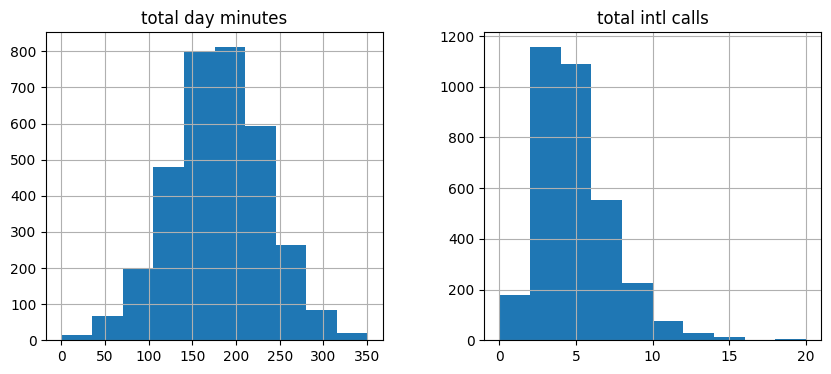

In [6]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10,4)) # figsize --> grafikon mérete, inchben

### kde:
https://en.wikipedia.org/wiki/Kernel_density_estimation

# Sűrűségfüggvény (Density plot)
- A sűrűségfüggvény a numerikus adatok eloszlását mutatja, így látható, mely értékek fordulnak elő gyakran és melyek ritkán.  
- Minden kiválasztott oszlop külön grafikonon jelenik meg (`subplots=True`), így könnyen összehasonlítható az eloszlásuk.  
- Az x-tengelyek nem osztoznak ugyanazon a skálán (`sharex=False`), minden grafikon a saját értéktartományát mutatja.  
- Az ábrák 1 sorban és 2 oszlopban helyezkednek el (`layout=(1,2)`), kényelmes 10×4-es méretben (`figsize=(10,4)`).  
- Hasznos az eloszlás alakjának vizsgálatára, a kiugró értékek és a gyakori értéktartományok gyors átlátására.  

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

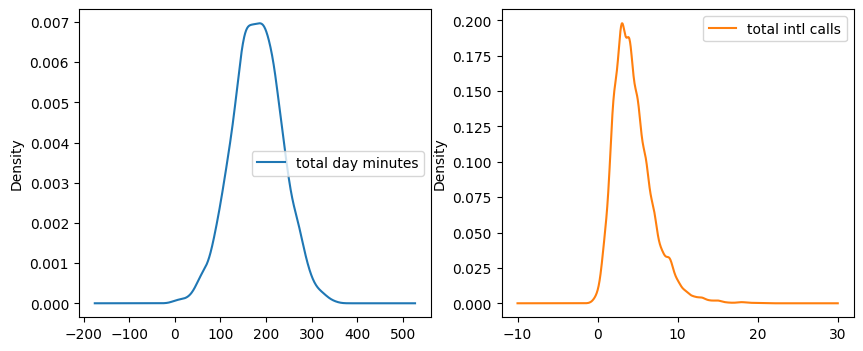

In [7]:
# sűrűségfüggvény
df[features].plot.density(subplots=True, sharex=False, layout=(1,2),figsize=(10,4))

# Boxplot (Dobozdiagram)
- A boxplot gyorsan áttekintést ad az adatok eloszlásáról és szóródásáról.  
- Megmutatja a mediánt, a kvartiliseket és az interkvartilis tartományt (IQR).  
- Segít azonosítani a kiugró értékeket (outliereket).  
- Hasznos az adatok középpontjának, szóródásának és aszimmetriájának vizuális elemzésére.

total day minutes       Axes(0.125,0.11;0.352273x0.77)
total intl calls     Axes(0.547727,0.11;0.352273x0.77)
dtype: object

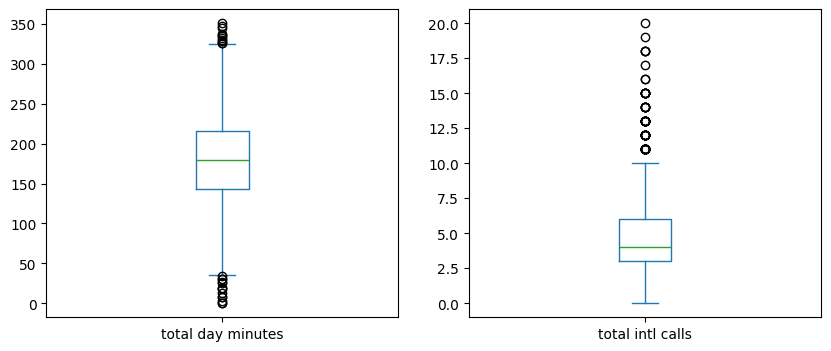

In [8]:
df[features].plot.box(subplots=True, sharex=False, layout=(1,2),figsize=(10,4))

#### Using seaborn

Seaborn API: https://seaborn.pydata.org/api.html

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: ylabel='total intl calls'>

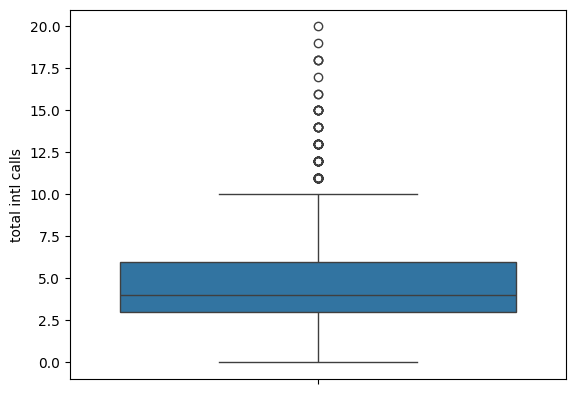

In [10]:
sns.boxplot(data=df['total intl calls'])

# `fig` és `ax` működése
- `fig` az egész ábrát (figure) reprezentálja, pl. mentéshez vagy ábra szintű beállításokhoz használjuk.  
- `ax` a konkrét tengely (subplot), amin a grafikon rajzolódik.  
- Ha csak 1 grafikon kell, nem kell előre definiálni a subplotok számát.  
- Több subplot esetén `nrows` és `ncols` paraméterekkel hozhatók létre a tengelyek, mindegyikre külön rajzolhatunk.  
- Ez a felépítés lehetővé teszi a grafikonok pontos elrendezését és testreszabását.

<Axes: ylabel='total intl calls'>

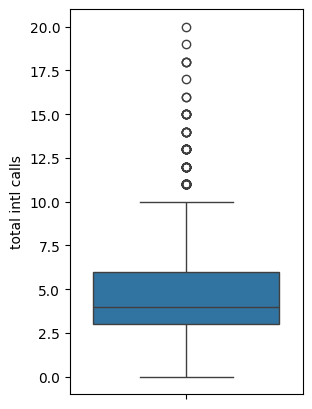

In [11]:
fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(data=df['total intl calls'], ax=ax)

# Violin plot (Hegedűdiagram)
- Megmutatja az adatok eloszlását és sűrűségét.
- Középen jelzi a mediánt, és gyakran a kvartiliseket is.
- Könnyen felismerhetők a többcsúcsú eloszlások és a ritka értékek.
- Hasznos az adatok szóródásának és eloszlásmintázatának gyors vizuális áttekintésére.

<Axes: ylabel='total intl calls'>

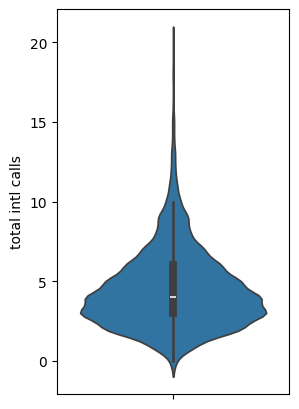

In [12]:
plt.figure(figsize=(3,5))
sns.violinplot(data=df['total intl calls'])

<Axes: >

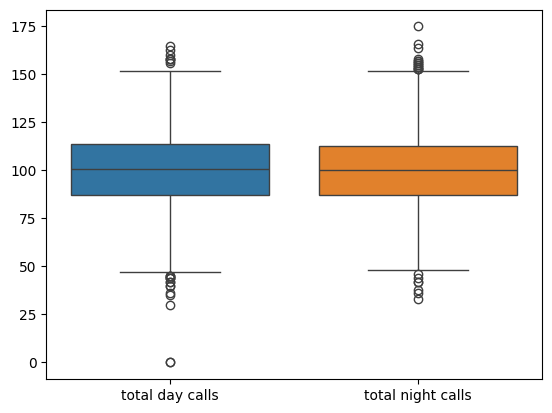

In [13]:
sns.boxplot(data=df[['total day calls','total night calls']])

<Axes: xlabel='churn', ylabel='total day calls'>

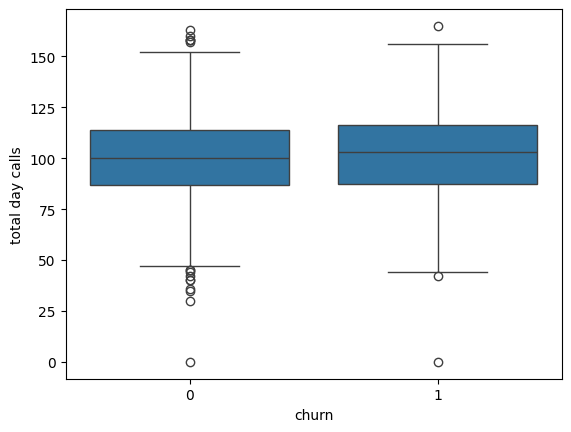

In [14]:
sns.boxplot(data=df,y='total day calls',x='churn')

<Axes: xlabel='churn', ylabel='total day calls'>

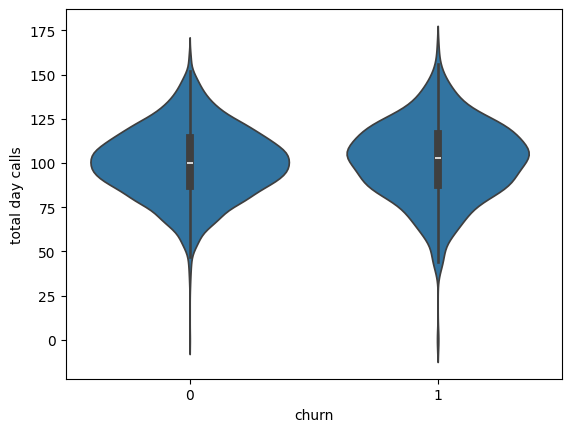

In [15]:
sns.violinplot(data=df,y='total day calls',x='churn')

<Axes: xlabel='churn', ylabel='total day calls'>

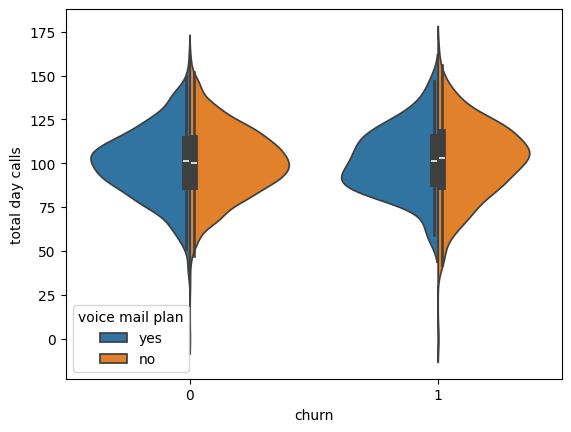

In [16]:
sns.violinplot(data=df,hue='voice mail plan', y='total day calls',x='churn',split=True)
# a split paraméter miatt egy ábrán jellennek meg

<Axes: xlabel='total intl calls', ylabel='state'>

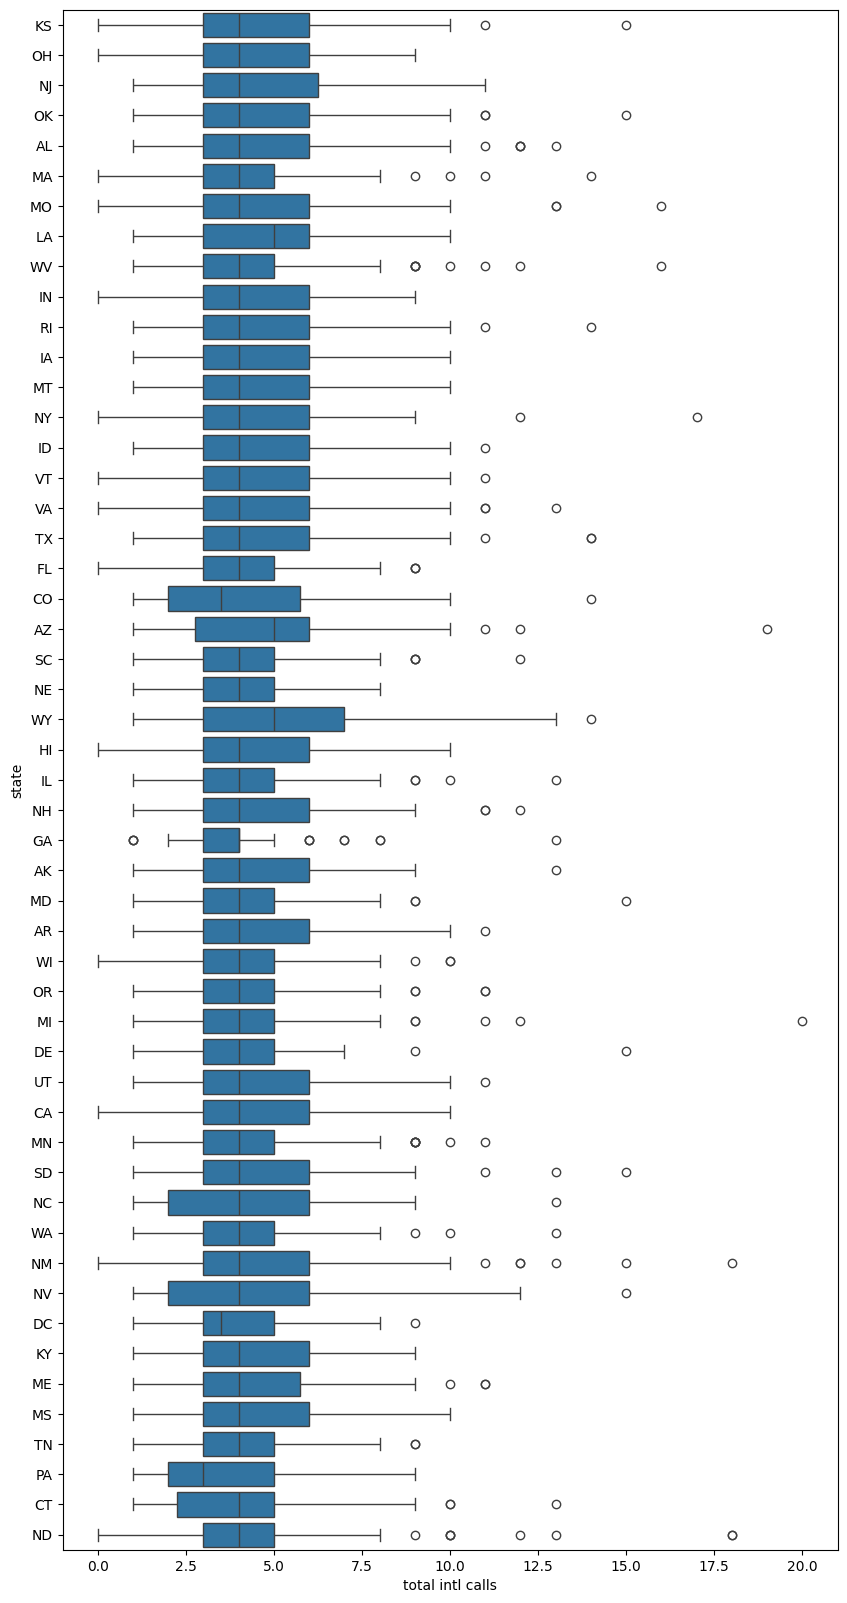

In [17]:
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(data=df,x='total intl calls', y='state',ax=ax)

<Axes: xlabel='churn', ylabel='count'>

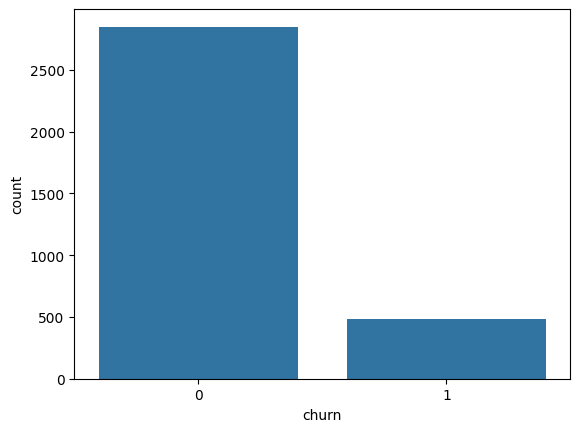

In [18]:
sns.countplot(data=df,x='churn')

<Axes: xlabel='total intl calls', ylabel='count'>

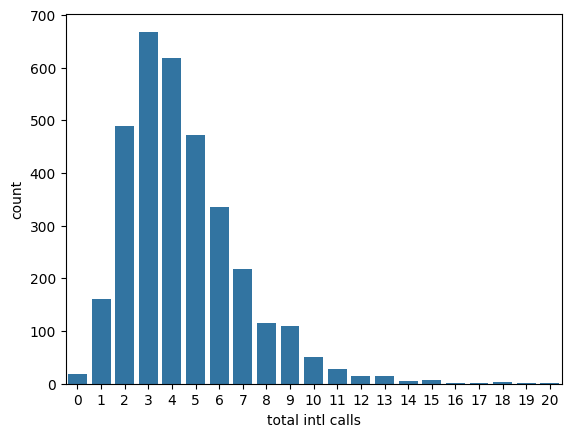

In [19]:
sns.countplot(data=df, x='total intl calls')

<Axes: xlabel='total intl calls', ylabel='count'>

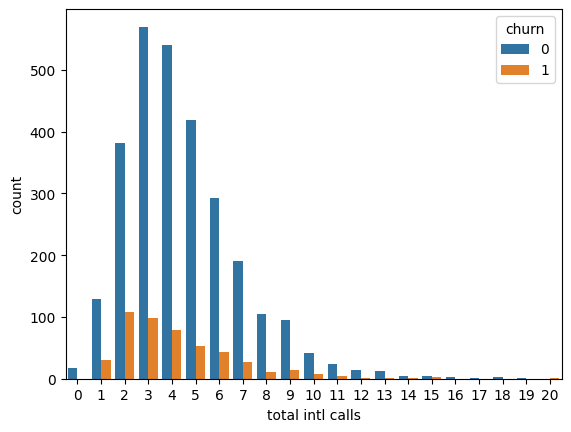

In [20]:
sns.countplot(data=df, x='total intl calls',hue='churn')

<Axes: xlabel='customer service calls', ylabel='count'>

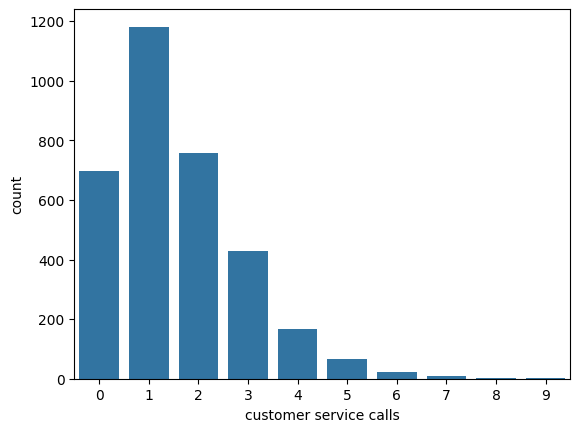

In [21]:
sns.countplot(data=df, x='customer service calls')

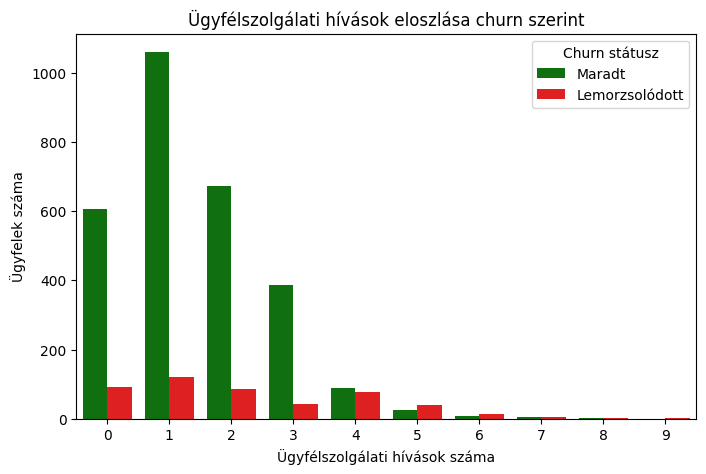

In [22]:
# Ábra létrehozása és méret beállítása
plt.figure(figsize=(8,5))

# Countplot elkészítése színezéssel
sns.countplot(
    data=df,
    x='customer service calls',
    hue='churn',
    palette=["green", "red"]  # első és második kategória színei
)

# Tengelyek átnevezése
plt.xlabel("Ügyfélszolgálati hívások száma")
plt.ylabel("Ügyfelek száma")

# Diagram címe
plt.title("Ügyfélszolgálati hívások eloszlása churn szerint")

# Jelmagyarázat testreszabása
plt.legend(title="Churn státusz", labels=["Maradt", "Lemorzsolódott"])

# Diagram megjelenítése
plt.show()

#### Correlation Matrix

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [24]:
numerikus_df = df.select_dtypes(include='number').corr() # alternatív megoldás, ha kell az összes numerikus oszlop
corr = df.loc[:,'number vmail messages':'customer service calls'].corr()
corr

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
number vmail messages,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total night calls,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802
total night charge,0.007663,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186,-0.009277


see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

<Axes: >

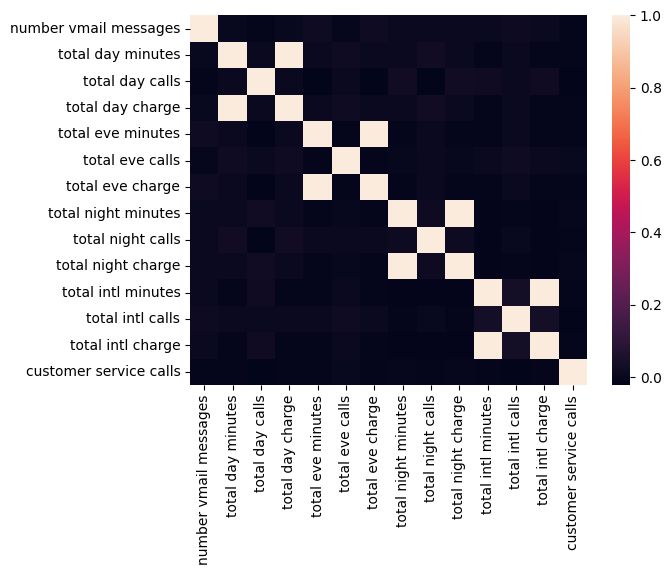

In [25]:
sns.heatmap(corr)

<Axes: >

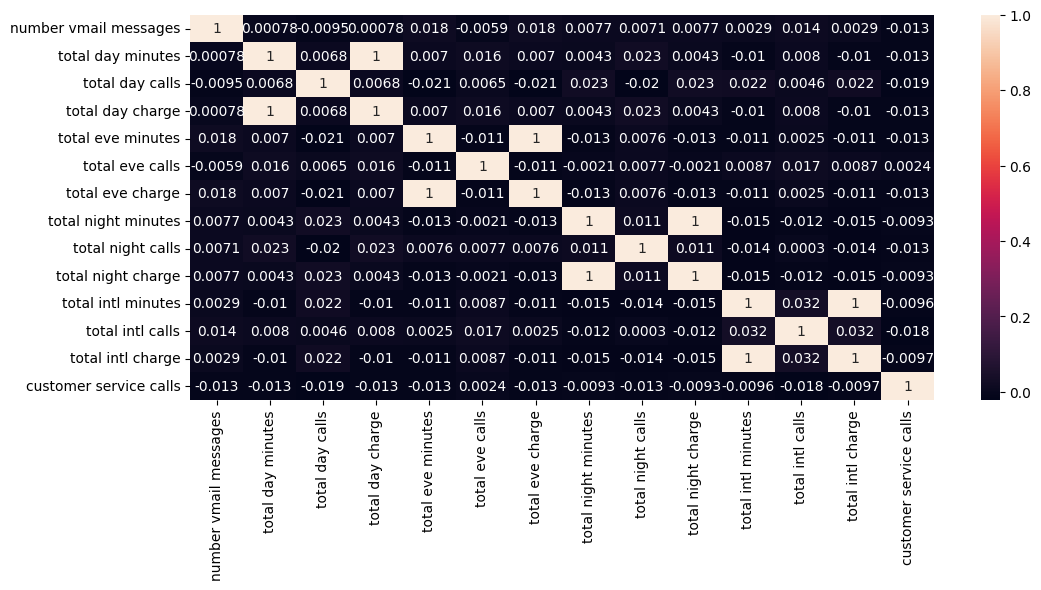

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(corr,annot=True,ax=ax) # annot --> értékek megjelenítése

#### Scatter Plot

<Axes: xlabel='total day minutes', ylabel='total night minutes'>

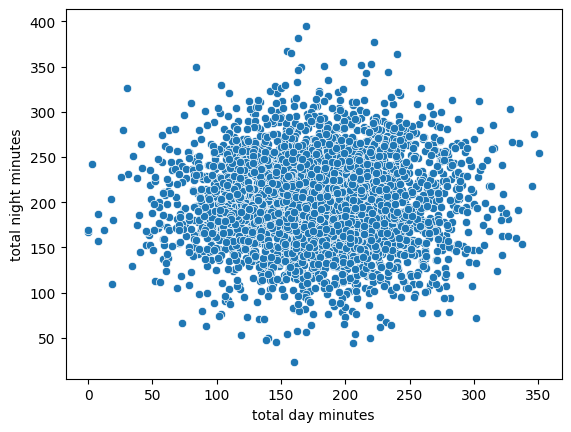

In [27]:
sns.scatterplot(data=df,x='total day minutes',y='total night minutes')

<Axes: xlabel='total day minutes', ylabel='total night minutes'>

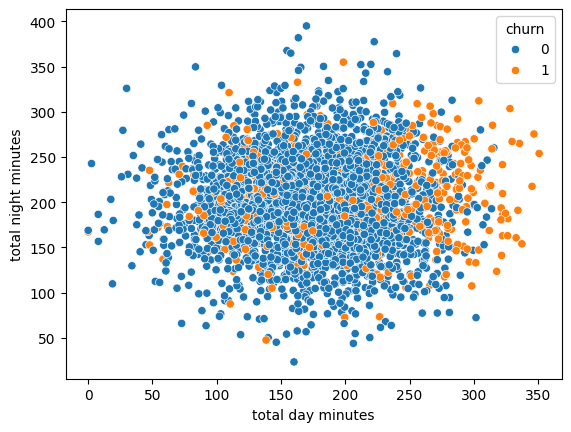

In [28]:
sns.scatterplot(data=df,x='total day minutes',y='total night minutes', hue='churn')

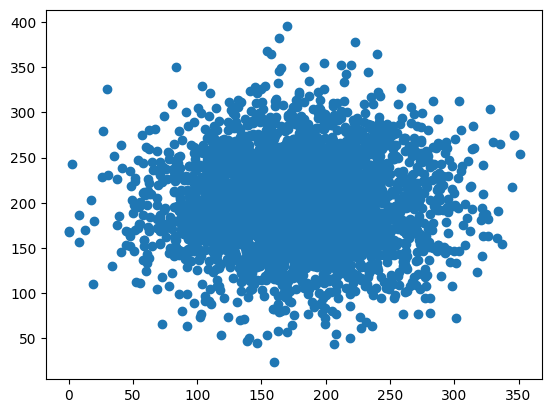

In [29]:
plt.scatter(df['total day minutes'],y=df['total night minutes']) # matplotlib scatter plotja

#### Jointplot

# Jointplot
- Két változó kapcsolatát scatterploton mutatja.
- A margókon az egyes változók eloszlása látszik (hisztogram vagy KDE).
- Így egyszerre látható az adatok szóródása és a változók közötti kapcsolat.
- Színezhető, regressziós vonal is hozzáadható a vizualizációhoz.

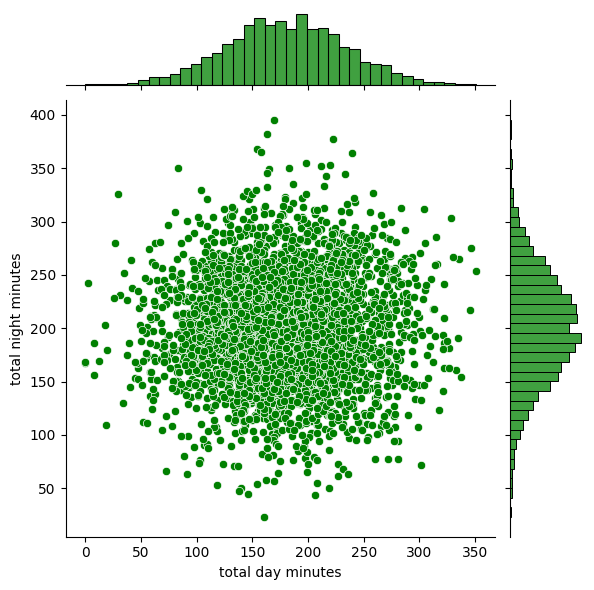

In [30]:
sns.jointplot(data=df,x='total day minutes',y='total night minutes', color='g')

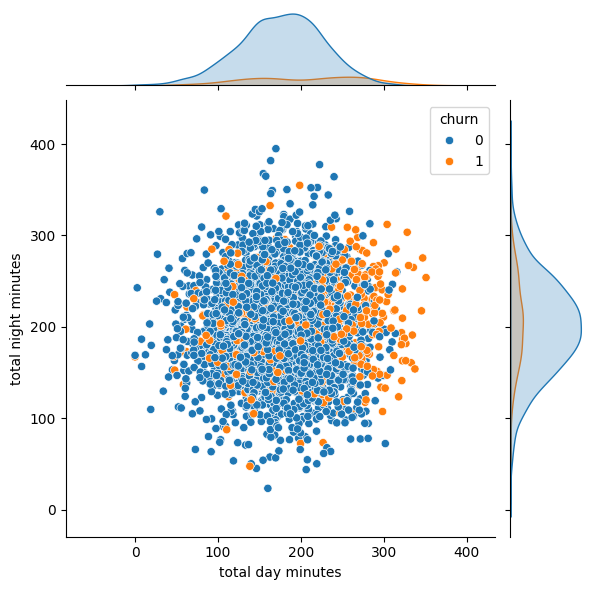

In [31]:
sns.jointplot(
    data=df,
    x='total day minutes',
    y='total night minutes',
    hue='churn',   # churn kategóriák szerint színez
    palette=["#1f77b4", "#ff7f0e"],  # opcionális színek
    kind='scatter'  # lehet 'scatter', 'kde', stb.
)

#### Scatter Matrix

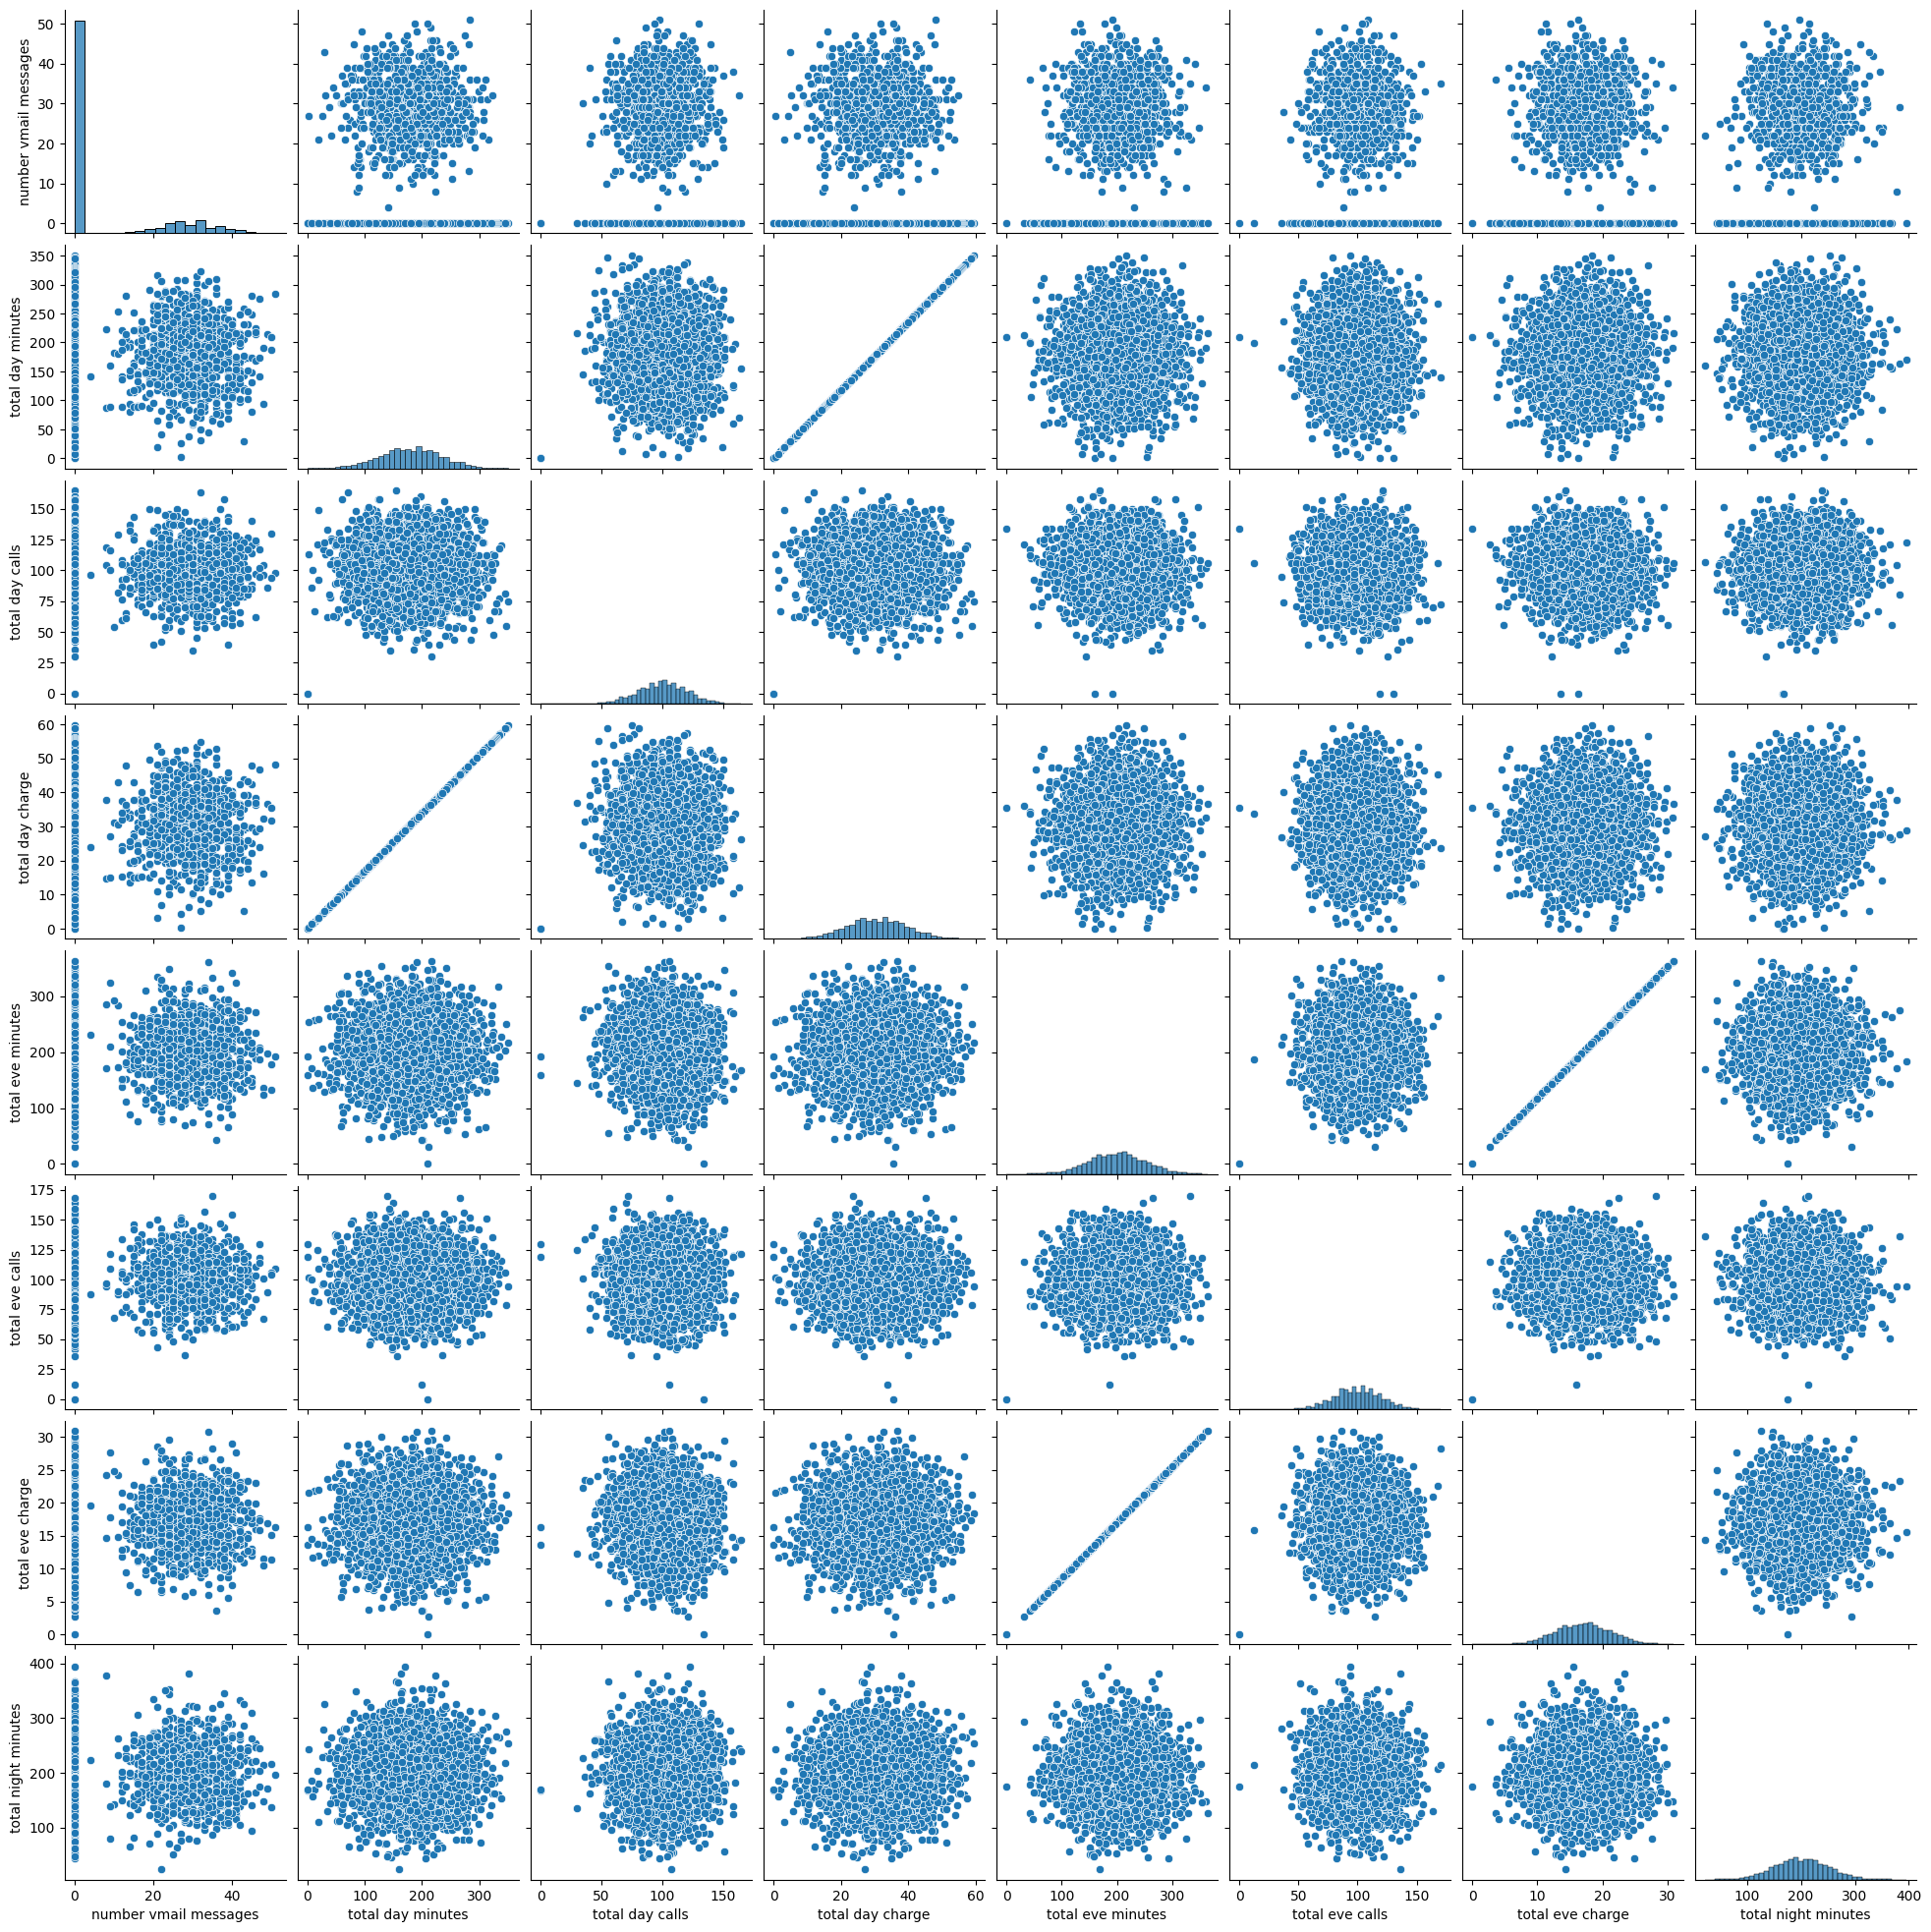

In [32]:
sns.pairplot(df.loc[:,'number vmail messages':'total night minutes'])

#### histplot

<Axes: xlabel='total intl calls', ylabel='Count'>

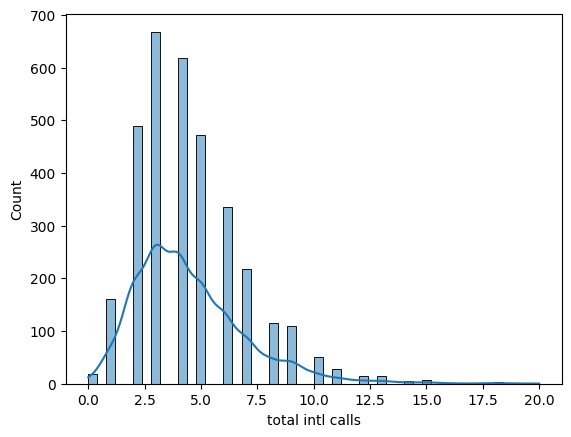

In [33]:
sns.histplot(df['total intl calls'], kde=True)

#### Subplots

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.violinplot(data=df['total intl calls'],ax=ax[0])
sns.boxplot(data=df['total intl calls'],ax=ax[1])

AttributeError: module 'matplotlib' has no attribute 'subplots'

<Axes: >

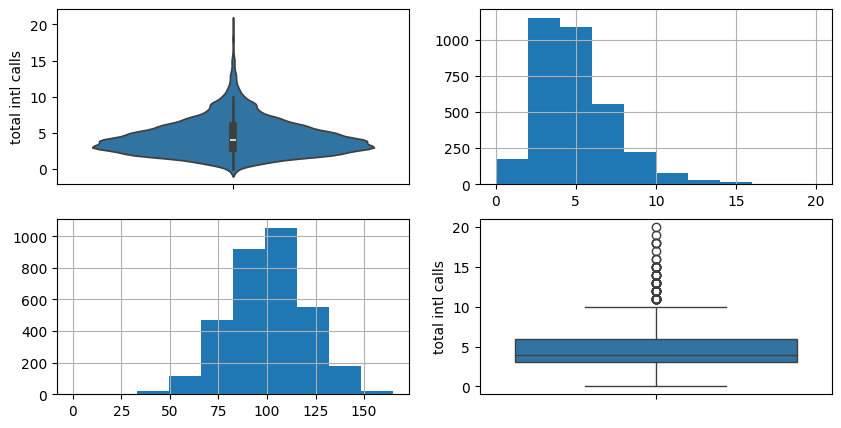

In [35]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
sns.violinplot(data=df['total intl calls'],ax=ax[0,0])
sns.boxplot(data=df['total intl calls'],ax=ax[1,1])
df['total intl calls'].hist(ax=ax[0,1])
df['total day calls'].hist(ax=ax[1,0])

### Feladat 1 – Hisztogram készítése pandas-szal

Készíts egy hisztogramot a `total eve charge` oszlop alapján a következő feltételekkel:

- Használd a pandas `hist()` függvényét.
- Az ábra mérete legyen 6 inch széles és 4 inch magas (`figsize=(6,4)`).
- A hisztogram segítségével vizsgáld meg az értékek eloszlását, és figyeld meg, mely értékek fordulnak elő gyakrabban.

<Axes: >

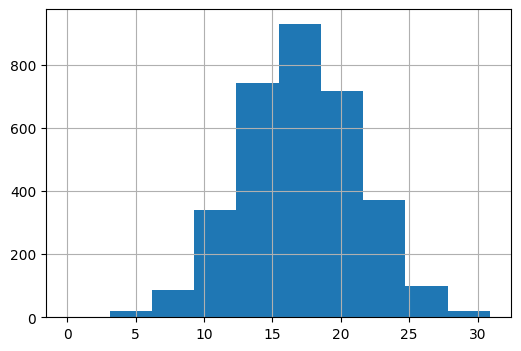

In [9]:
df['total eve charge'].hist(figsize=(6,4))

### Feladat 2 – Boxplot készítése Seaborn-nal

Készíts egy **boxplotot** a következő feltételekkel:

- Használd a **Seaborn** függvénykönyvtárat (`sns.boxplot`).
- Az **x tengelyen** legyen az `international plan` oszlop.
- Az **y tengelyen** legyen a `customer service calls` oszlop.
- Az ábra **mérete legyen 8 inch széles és 6 inch magas** (`figsize=(6,3)`).
- Figyeld meg az eloszlást, a mediánt, és a kiugró értékeket.  

<Axes: xlabel='international plan', ylabel='customer service calls'>

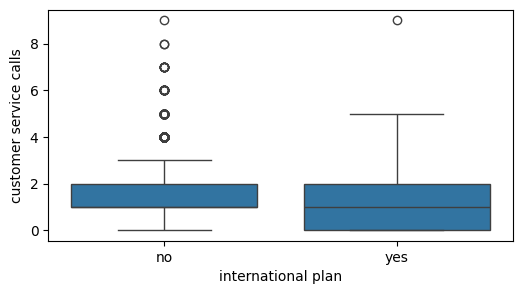

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(data=df, y="customer service calls",  x="international plan",ax=ax)

### Feladat 3 – Violin plot készítése Seaborn-nal

Készíts egy **violin plotot** a következő feltételekkel:

- Használd a **Seaborn** függvénykönyvtárat (`sns.violinplot`).
- Az **x tengelyen** legyen az `international plan` oszlop.
- Az **y tengelyen** legyen a `customer service calls` oszlop.
- A **hue paraméter** értéke legyen a `churn` oszlop, így a kategóriák színezve jelennek meg.
- Az ábra **mérete legyen 8 inch széles és 6 inch magas** (`figsize=(8,6)`).
- Figyeld meg az eloszlás mintázatát és a kategóriák közötti különbségeket.

<Axes: xlabel='international plan', ylabel='customer service calls'>

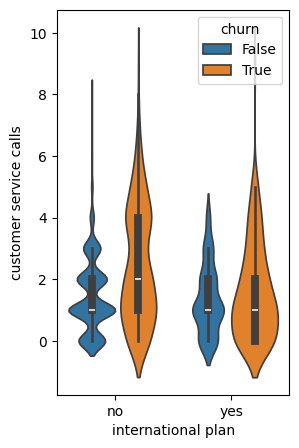

In [18]:
plt.figure(figsize=(3,5))
sns.violinplot(data= df, x = "international plan", y= "customer service calls", hue='churn')

### Feladat 4 – Countplot készítése Seaborn-nal

Készíts egy **countplotot** a következő feltételekkel:

- Használd a **Seaborn** függvénykönyvtárat (`sns.countplot`).
- Az **x tengelyen** a `total intl charge` oszlop szerepeljen, amely az ügyfelek **nemzetközi hívások díját** mutatja.
- Az **y tengelyen** a `Ügyfelek száma` legyen.
- Színezd a diagramot a `churn` oszlop alapján, hogy látható legyen, mely ügyfelek maradtak és melyek morzsolódtak le.
- Az ábra **mérete legyen 8 inch széles és 5 inch magas** (`figsize=(8,5)`).
- Adj címet a diagramnak: `"Nemzetközi hívások díjának eloszlása churn szerint"`.
- Testreszabott jelmagyarázatot készíts a kategóriákhoz (`Maradt`, `Lemorzsolódott`).

<function matplotlib.pyplot.show(close=None, block=None)>

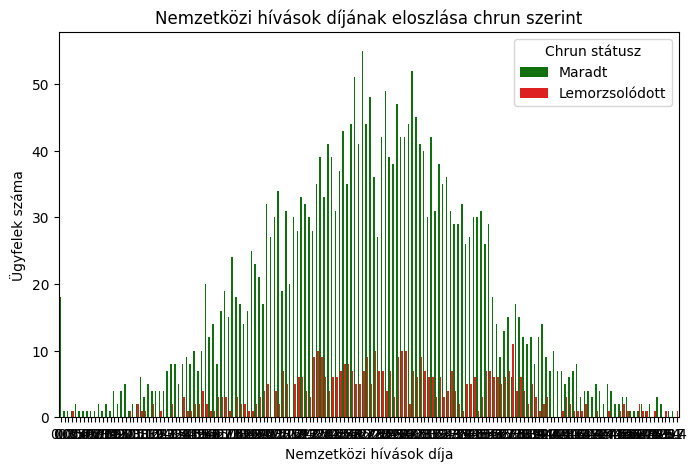

In [19]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='total intl charge', hue='churn', palette=['green', 'red'])

plt.xlabel('Nemzetközi hívások díja')
plt.ylabel('Ügyfelek száma')

plt.title('Nemzetközi hívások díjának eloszlása chrun szerint')

plt.legend(title='Chrun státusz', labels=['Maradt', 'Lemorzsolódott'])

plt.show